# Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import norm, zscore, probplot

# Data Loading & Preprocessing

In [2]:
# Path to the original dataset
file_path ='C:/Users/Gehan/sensor_data.csv'

# Temporary file path for the cleaned data
cleaned_file_path = 'C:/Users/Gehan/cleaned_sensor_data.csv'

# Process the file to remove rows with incorrect number of commas
expected_commas = 11  # As there are 12 columns, we expect 11 commas
with open(file_path, 'r', encoding="utf-8") as file, open(cleaned_file_path, 'w', encoding="utf-8") as outfile:
    for line in file:
        if line.count(',') == expected_commas:
            outfile.write(line)


# Load the cleaned dataset
headers = ['gyro_x', 'gyro_y',	'gyro_z',	'flex1',	'flex2',	'flex3',	'flex4',	'flex5',	'contact1',	'contact2',	'contact3',	'char']
data = pd.read_csv(cleaned_file_path, header=None, names=headers)
for column in ['flex1',	'flex2',	'flex3',	'flex4',	'flex5']:
    data[column] = pd.to_numeric( data[column] , errors='coerce')

data.drop(['gyro_x', 'gyro_y',	'gyro_z'], axis=1, inplace=True)

flex_features = ['flex1',	'flex2',	'flex3',	'flex4',	'flex5']
important_features = ['flex1',	'flex2',	'flex3',	'flex4',	'flex5',	'contact1',	'contact2',	'contact3']

# Display the first few rows of the dataset
print(data.head())

   flex1  flex2  flex3  flex4  flex5  contact1  contact2  contact3 char
0  114.0  228.0  328.0  161.0  182.0       0.0       0.0       1.0    ا
1  115.0  229.0  328.0  162.0  202.0       0.0       0.0       1.0    ا
2  115.0  229.0  328.0  162.0  202.0       0.0       0.0       1.0    ا
3  117.0  230.0  329.0  163.0  213.0       0.0       0.0       1.0    ا
4  117.0  230.0  329.0  163.0  213.0       0.0       0.0       1.0    ا


C:\Users\Gehan\AppData\Local\Temp\ipykernel_22288\1937080566.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(cleaned_file_path, header=None, names=headers)


In [3]:
# Summary statistics
print(data.describe())

              flex1         flex2         flex3         flex4         flex5  \
count  1.054524e+06  1.054524e+06  1.054521e+06  1.054523e+06  1.054523e+06   
mean   1.558764e+02  3.191599e+02  4.384085e+02  2.539438e+02  1.864344e+02   
std    3.502465e+02  5.931174e+02  1.043154e+03  6.037989e+02  3.614791e+02   
min    0.000000e+00  4.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00   
25%    1.040000e+02  2.480000e+02  3.520000e+02  2.100000e+02  1.500000e+02   
50%    1.310000e+02  2.760000e+02  4.140000e+02  2.280000e+02  1.800000e+02   
75%    1.960000e+02  3.310000e+02  4.990000e+02  2.790000e+02  2.060000e+02   
max    2.680000e+04  4.910000e+04  5.054960e+05  3.043180e+05  2.400000e+04   

           contact1      contact2      contact3  
count  1.054070e+06  1.054125e+06  1.054070e+06  
mean   8.739173e-02  3.827345e-02  3.663362e-01  
std    2.824084e-01  1.918557e-01  4.818031e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.0

In [4]:
# Check for missing values
print(data.isnull().sum())

# Handling missing values
data.dropna(inplace=True)

flex1          0
flex2          0
flex3          3
flex4          1
flex5          1
contact1     454
contact2     399
contact3     454
char        1612
dtype: int64


In [ ]:
for sensor in flex_features:
    # Calculate the IQR for flex5
    Q1 = data[sensor].quantile(0.25)
    Q3 = data[sensor].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where flex5 values are outliers
    data = data[(data[sensor] >= lower_bound) & (data[sensor] <= upper_bound)]

# Data Visualization

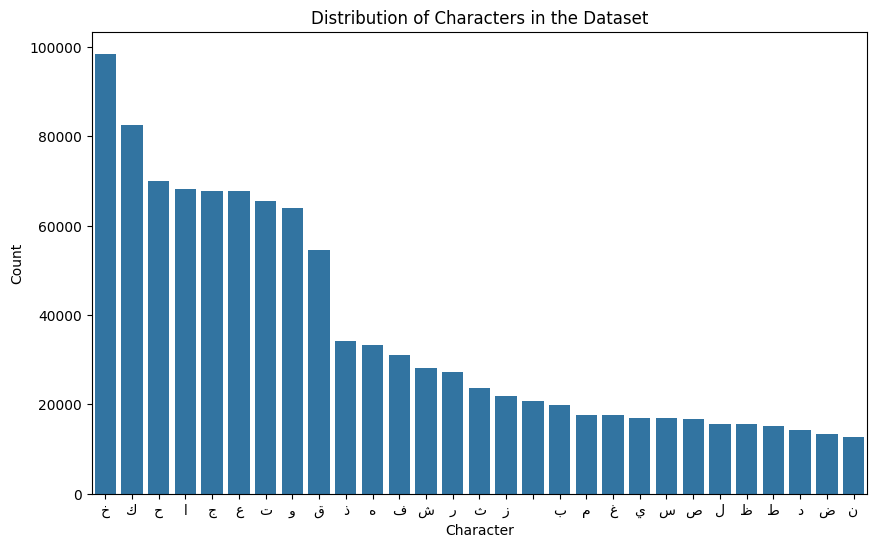

In [89]:
# Check the distribution of characters in the dataset
char_counts = data['char'].value_counts()

# Plot the distribution of characters
plt.figure(figsize=(10, 6))
sns.countplot(x='char', data=data, order=char_counts.index)
plt.title('Distribution of Characters in the Dataset')
plt.xlabel('Character')
plt.ylabel('Count')
plt.savefig('distribution_graph.png')
plt.show()

In [7]:
# Function to plot histograms and Q-Q plots
def plot_distribution(sensor_data, sensor_name):
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(sensor_data, kde=True, stat="density", linewidth=0)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, sensor_data.mean(), sensor_data.std())
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Histogram and Normal Distribution for {sensor_name}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(sensor_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {sensor_name}')
    
    plt.tight_layout()
    plt.show()

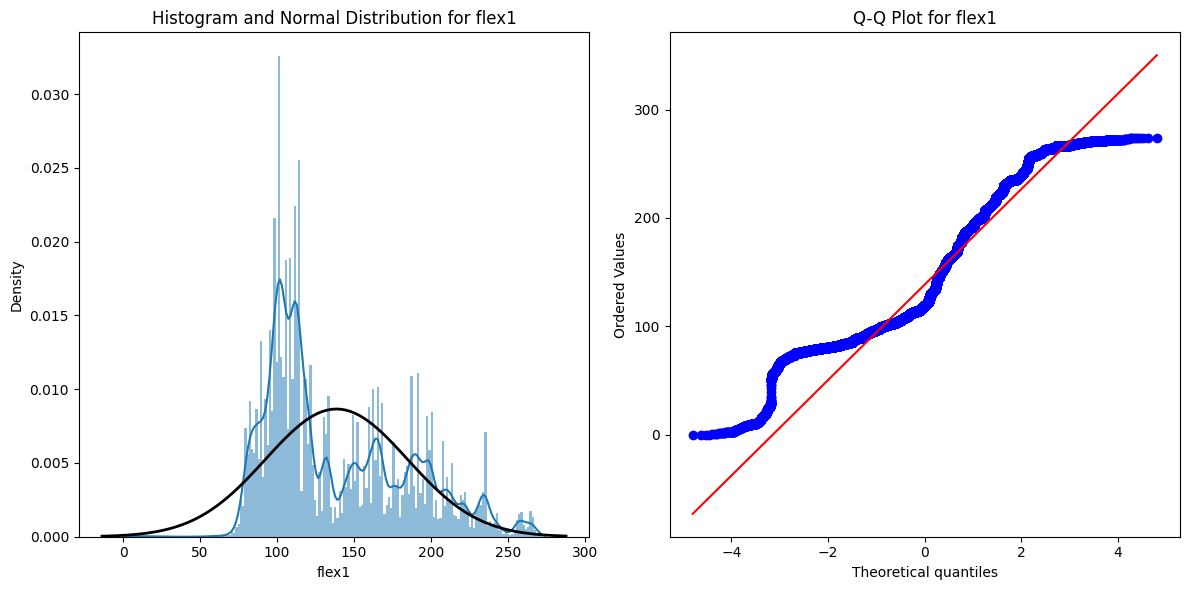

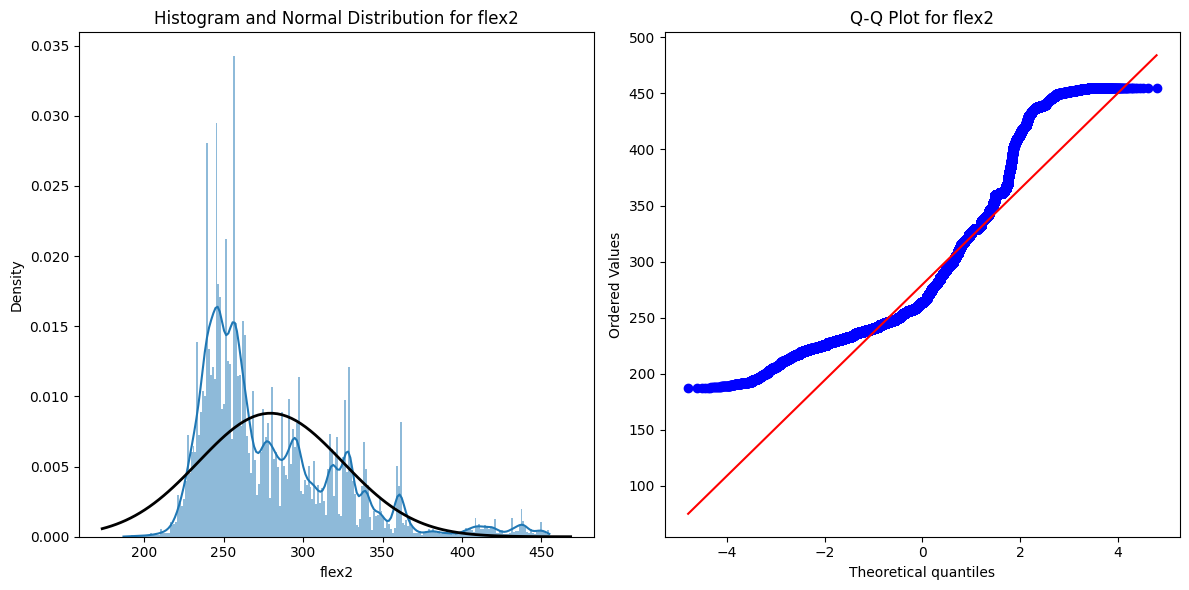

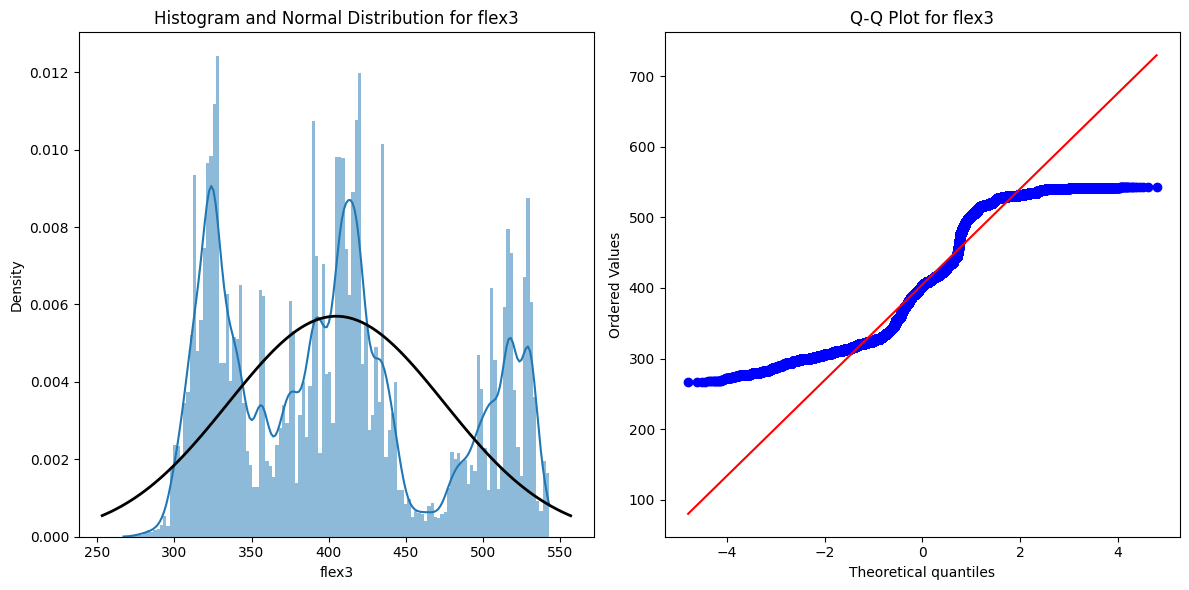

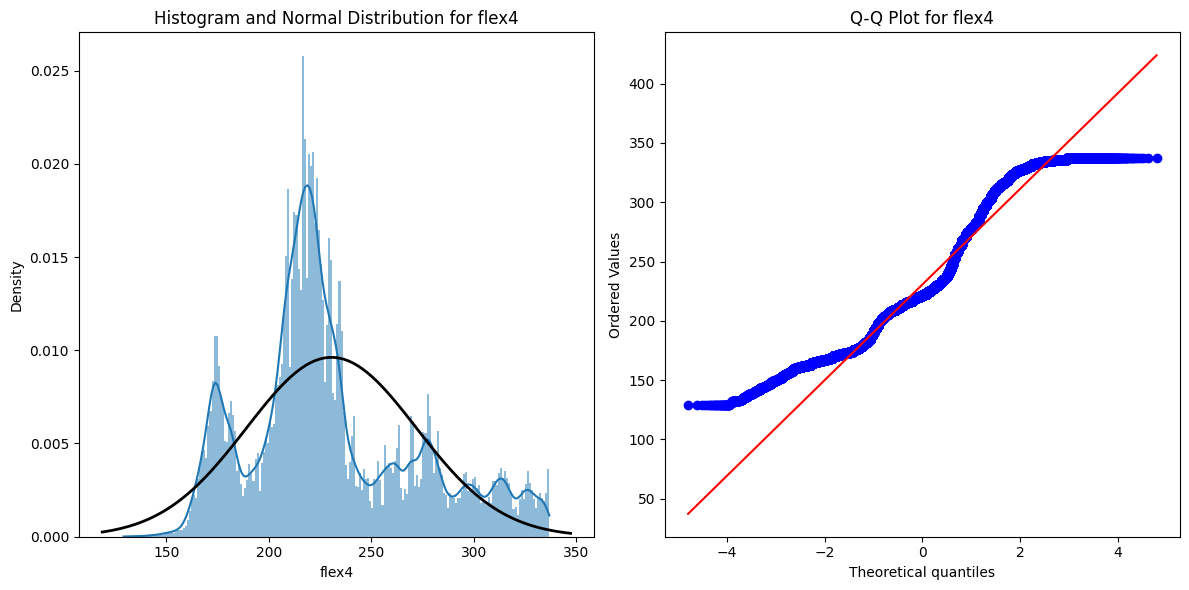

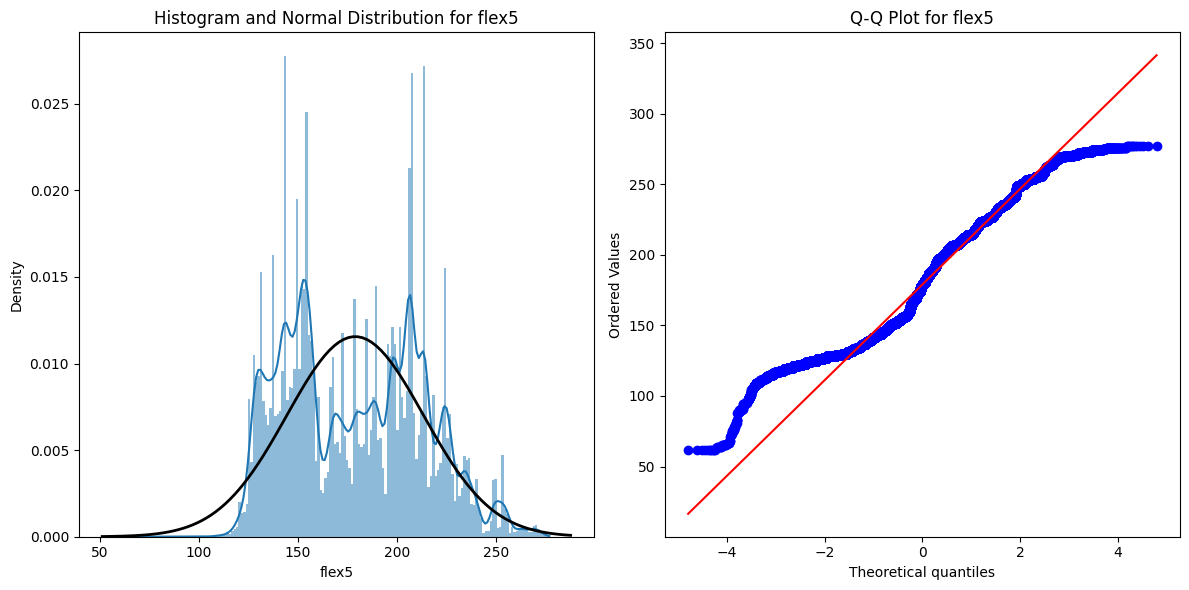

In [9]:
# Plot distribution for each sensor
for sensor in flex_features:
    plot_distribution(data[sensor], sensor)

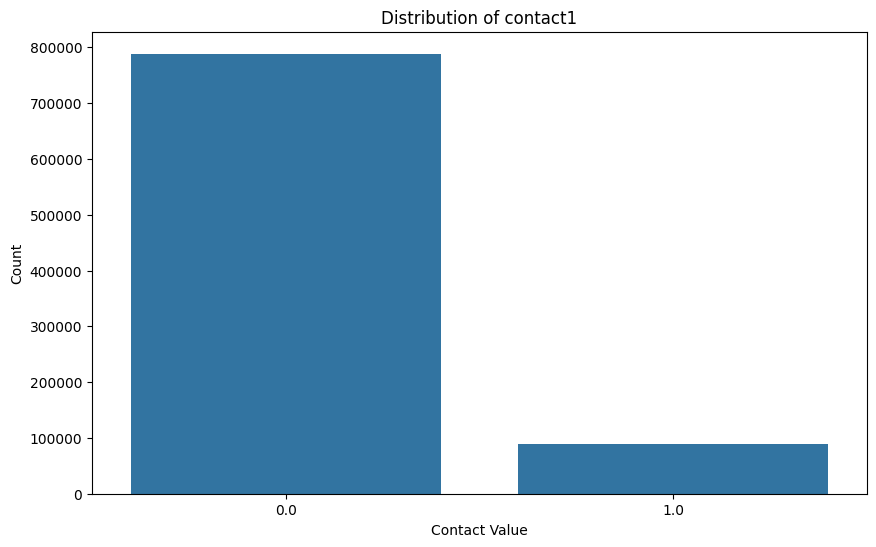

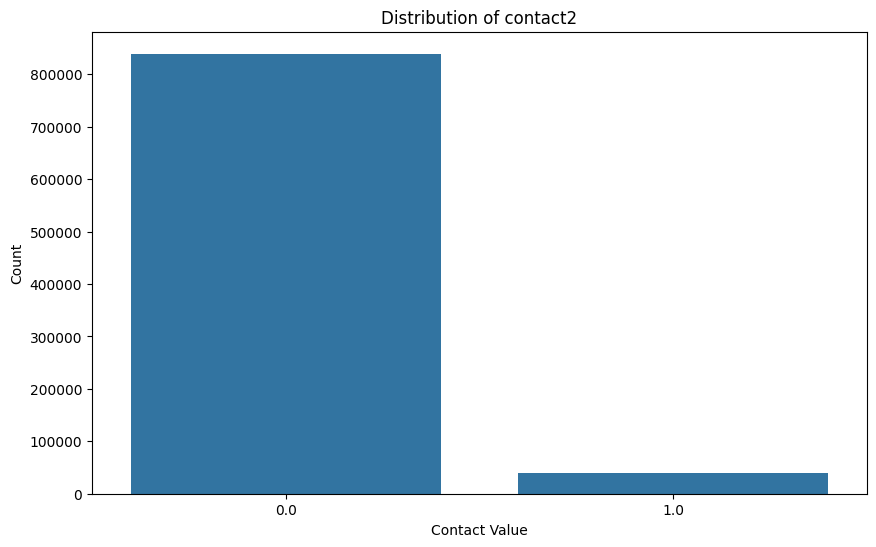

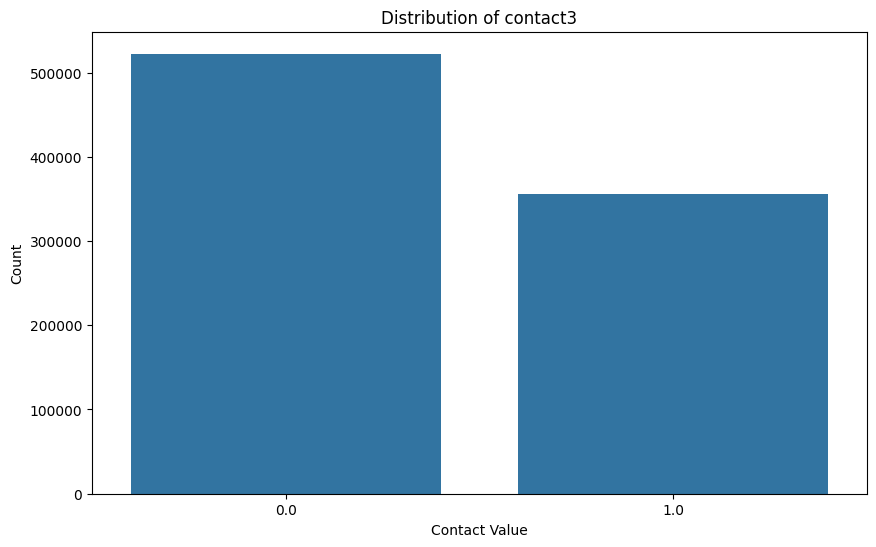

In [26]:
for contact in ['contact1', 'contact2', 'contact3']:
    # Check the distribution of characters in the dataset
    value_counts = data[contact].value_counts()

    # Plot the distribution of characters
    plt.figure(figsize=(10, 6))
    sns.countplot(x=contact, data=data, order=value_counts.index)
    plt.xlabel('Contact Value')
    plt.ylabel('Count')
    plt.title(f'Distribution of {contact}')
    plt.savefig(contact+'_distribution.png')

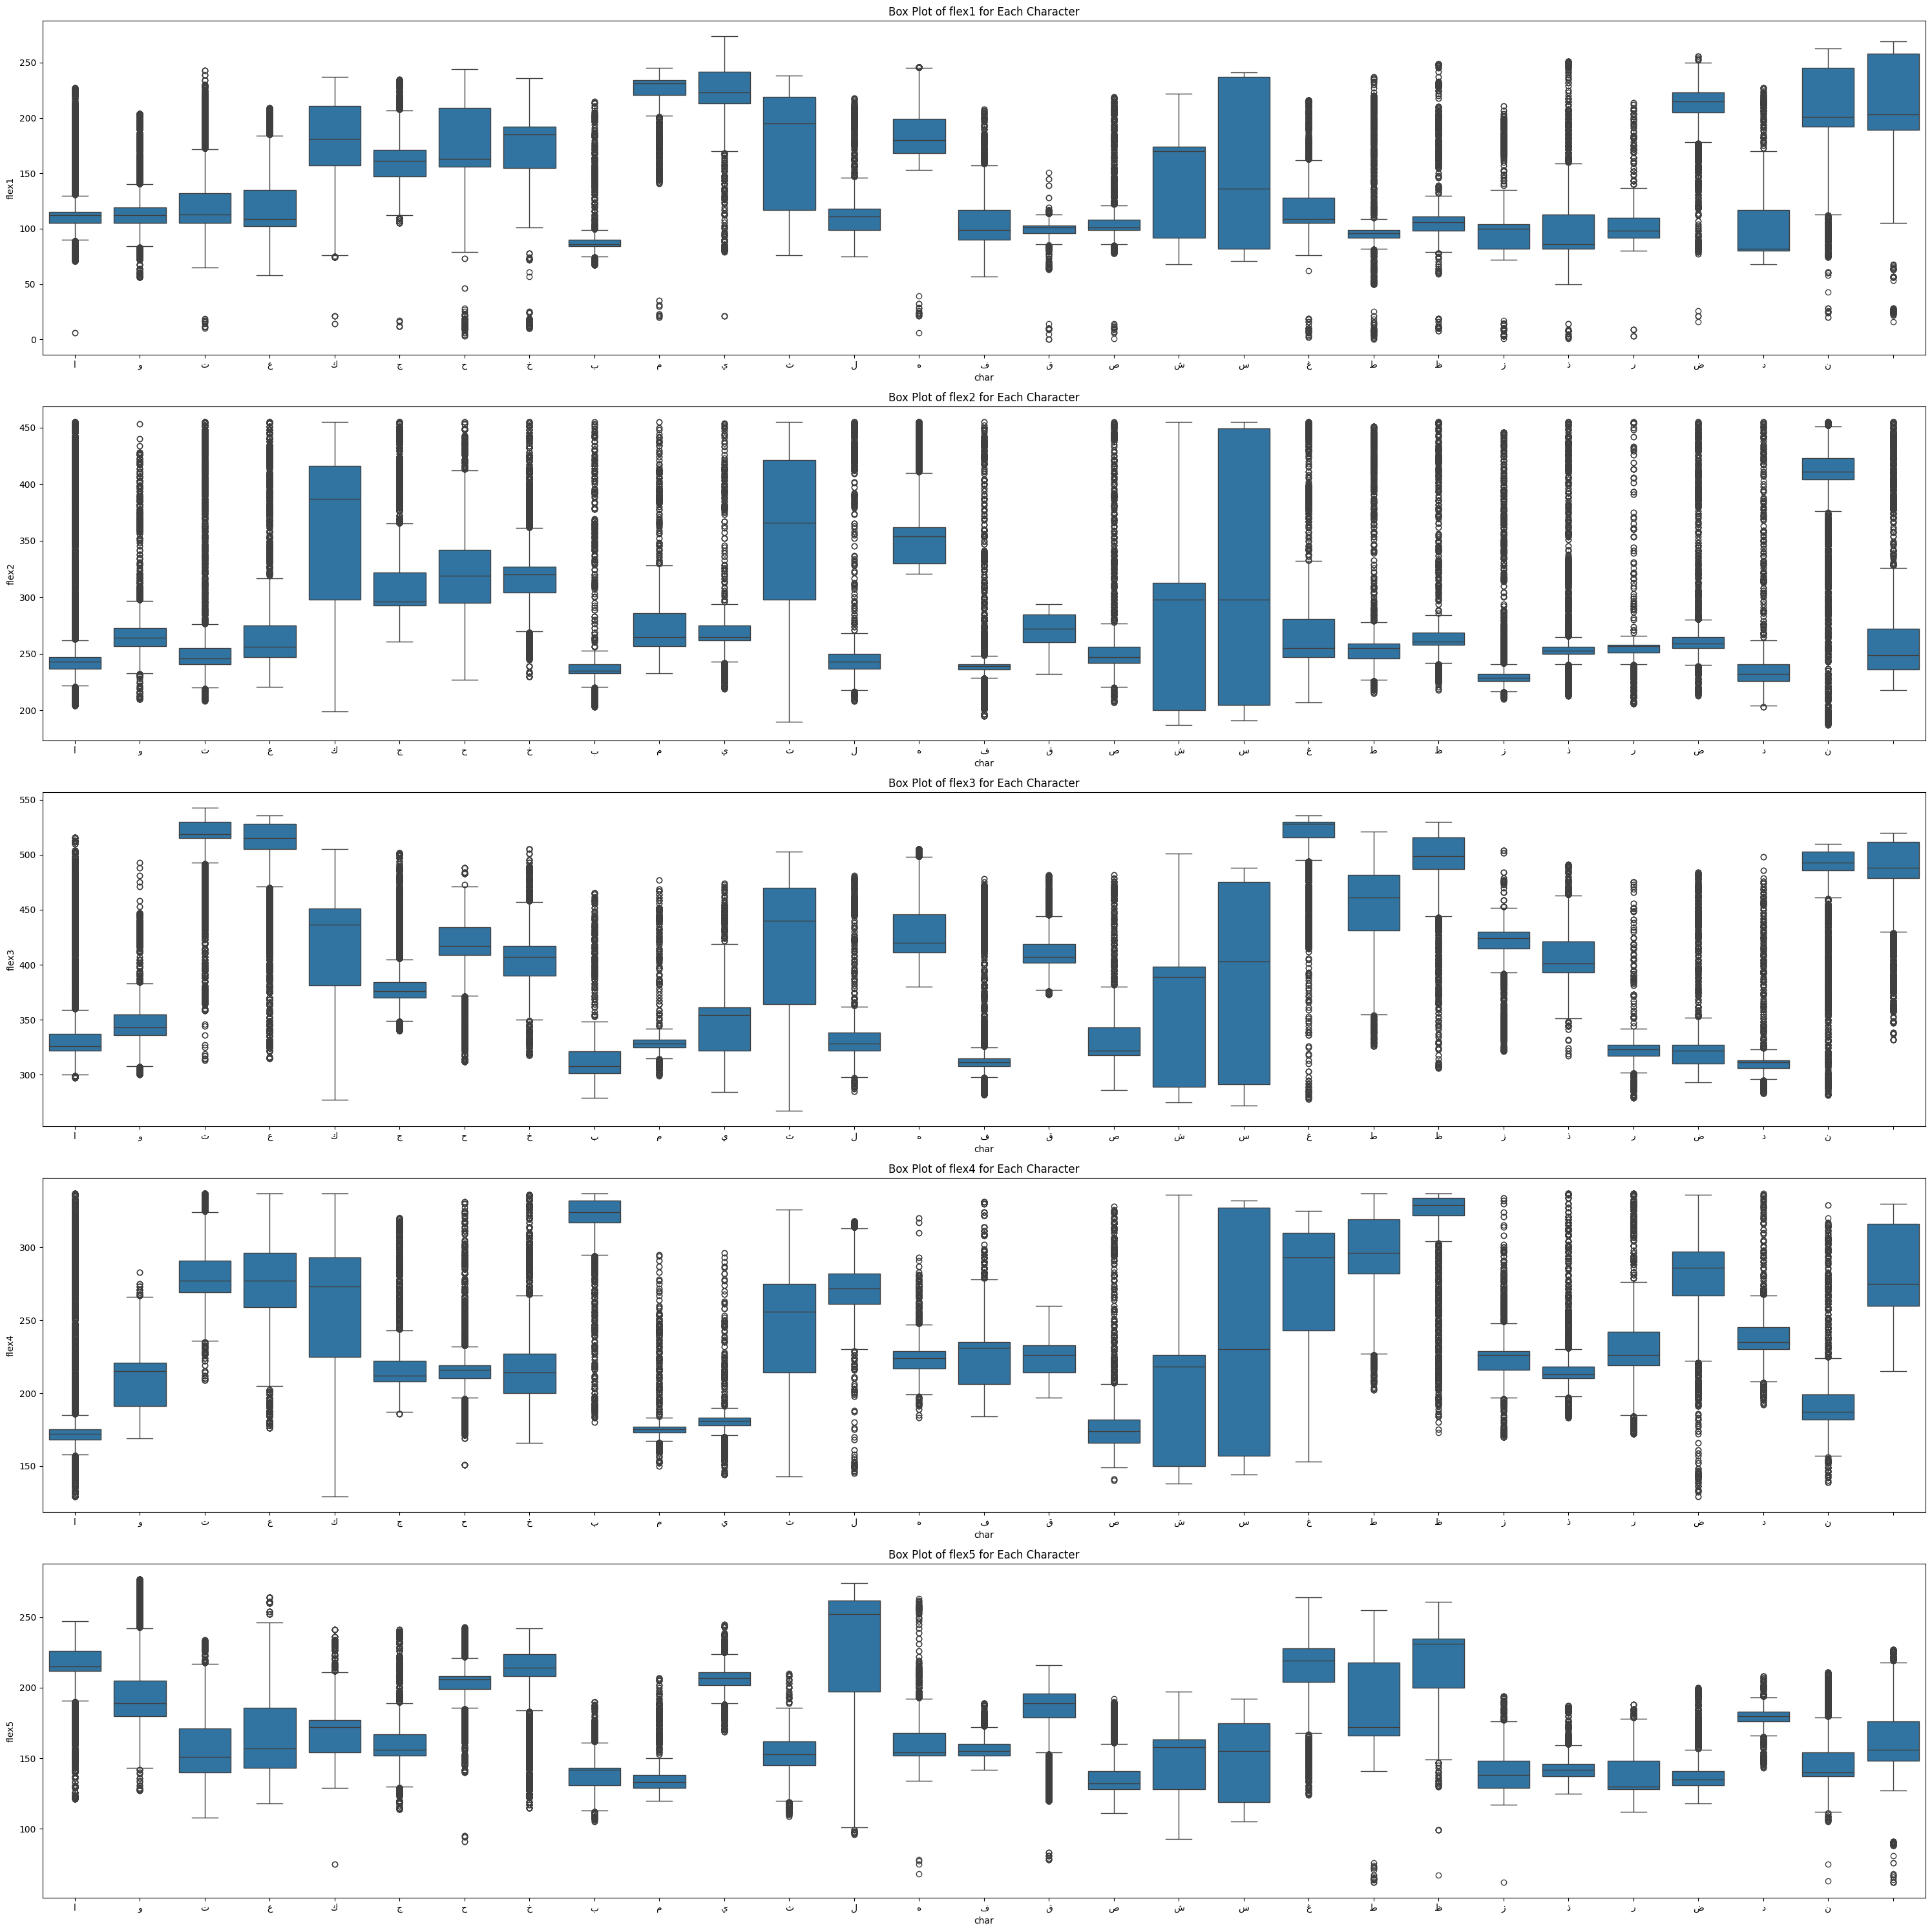

In [23]:
# Box plots of sensor values for each character
plt.figure(figsize=(30, 30))

for i, sensor in enumerate(flex_features):
    plt.subplot(5,1, i + 1)
    sns.boxplot(x='char', y=sensor, data=data)
    plt.title(f'Box Plot of {sensor} for Each Character')
plt.tight_layout()
plt.savefig('Box_plot.png')
plt.show()

C:\Users\Gehan\AppData\Local\Temp\ipykernel_22288\1468522806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


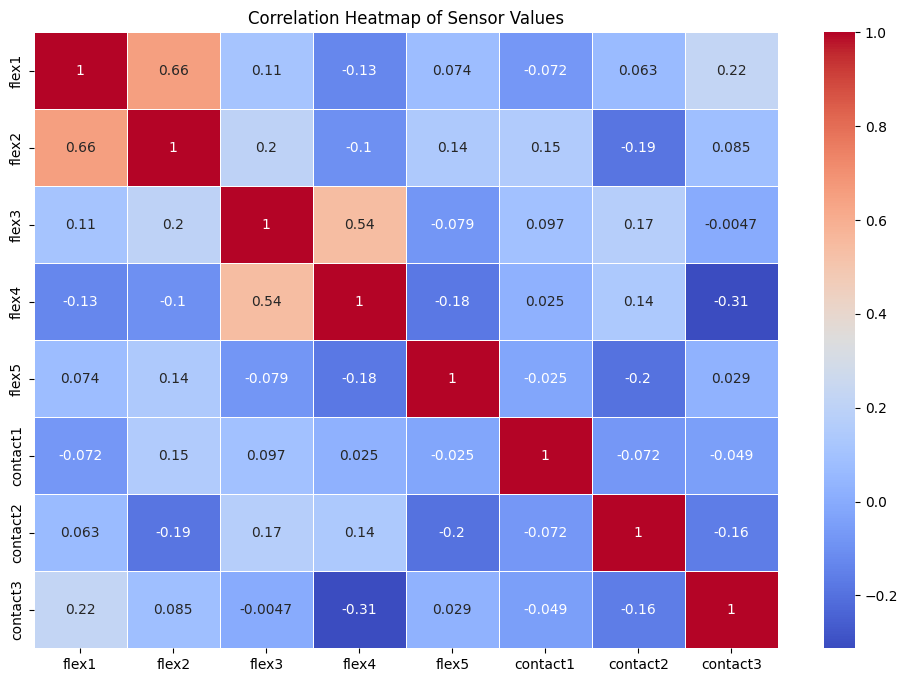

In [16]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Sensor Values')
plt.savefig('correlation_heatmap.png')
plt.show()

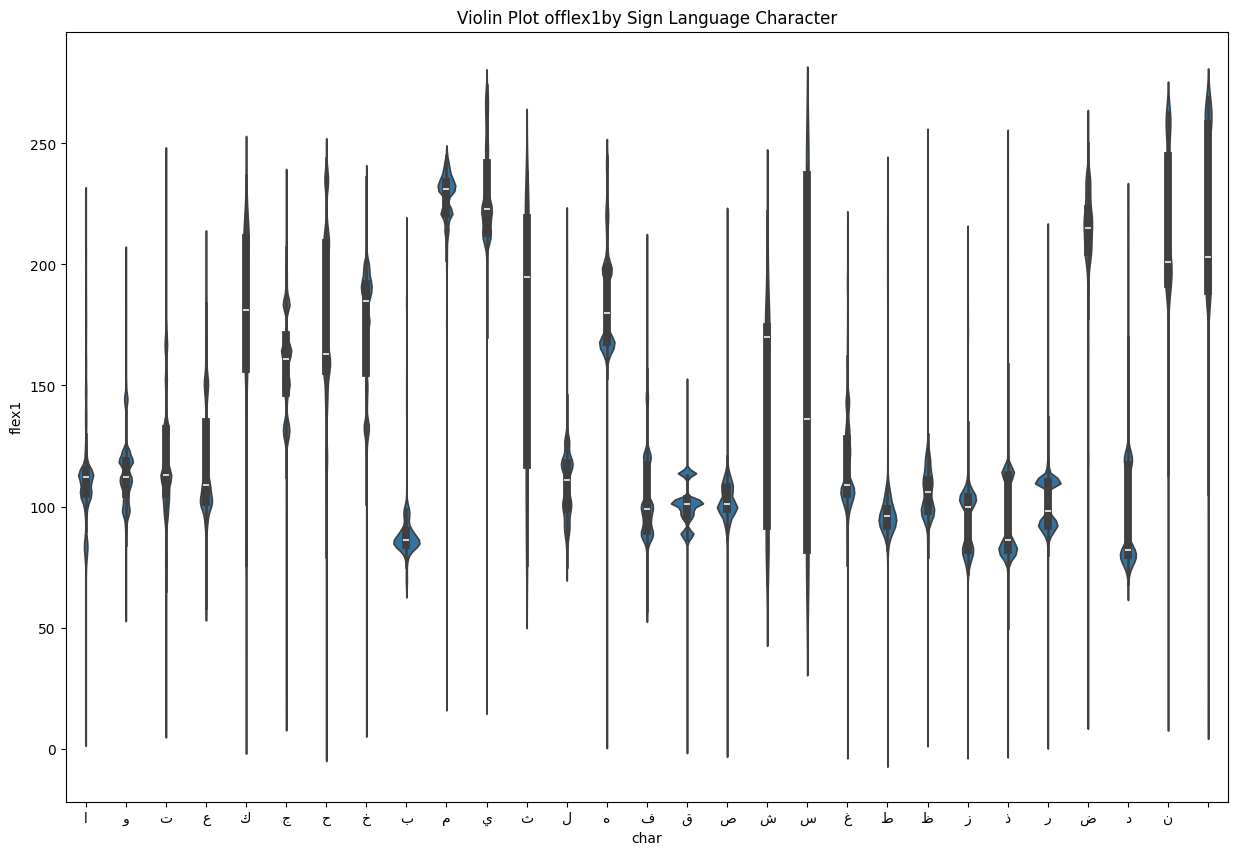

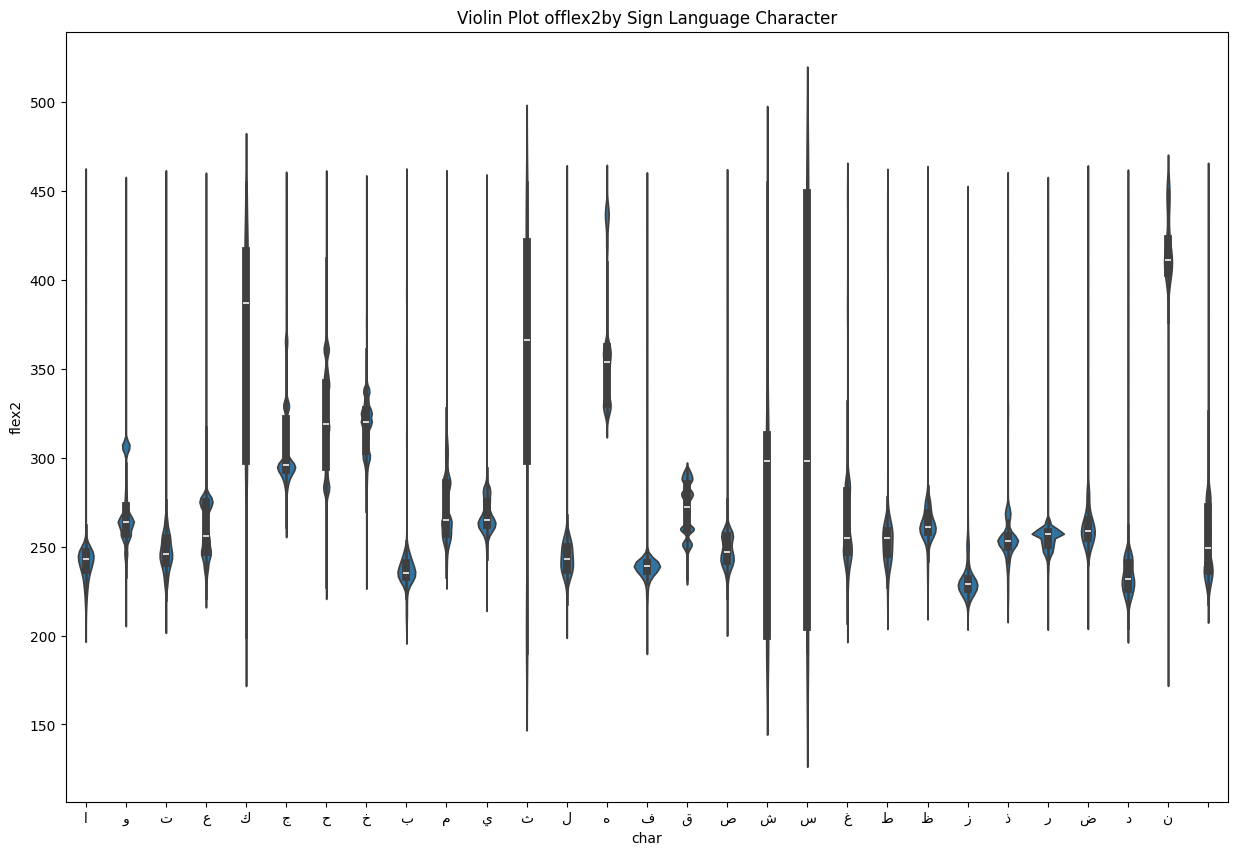

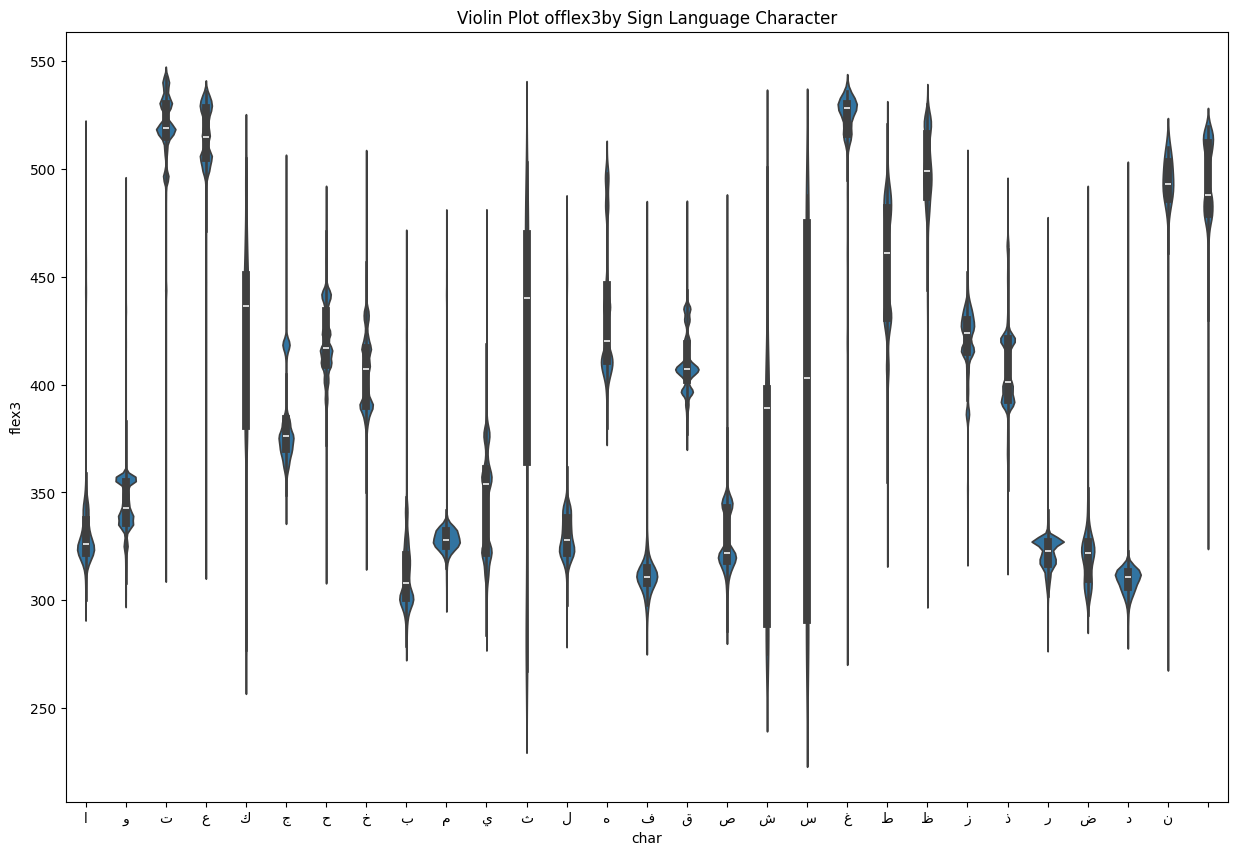

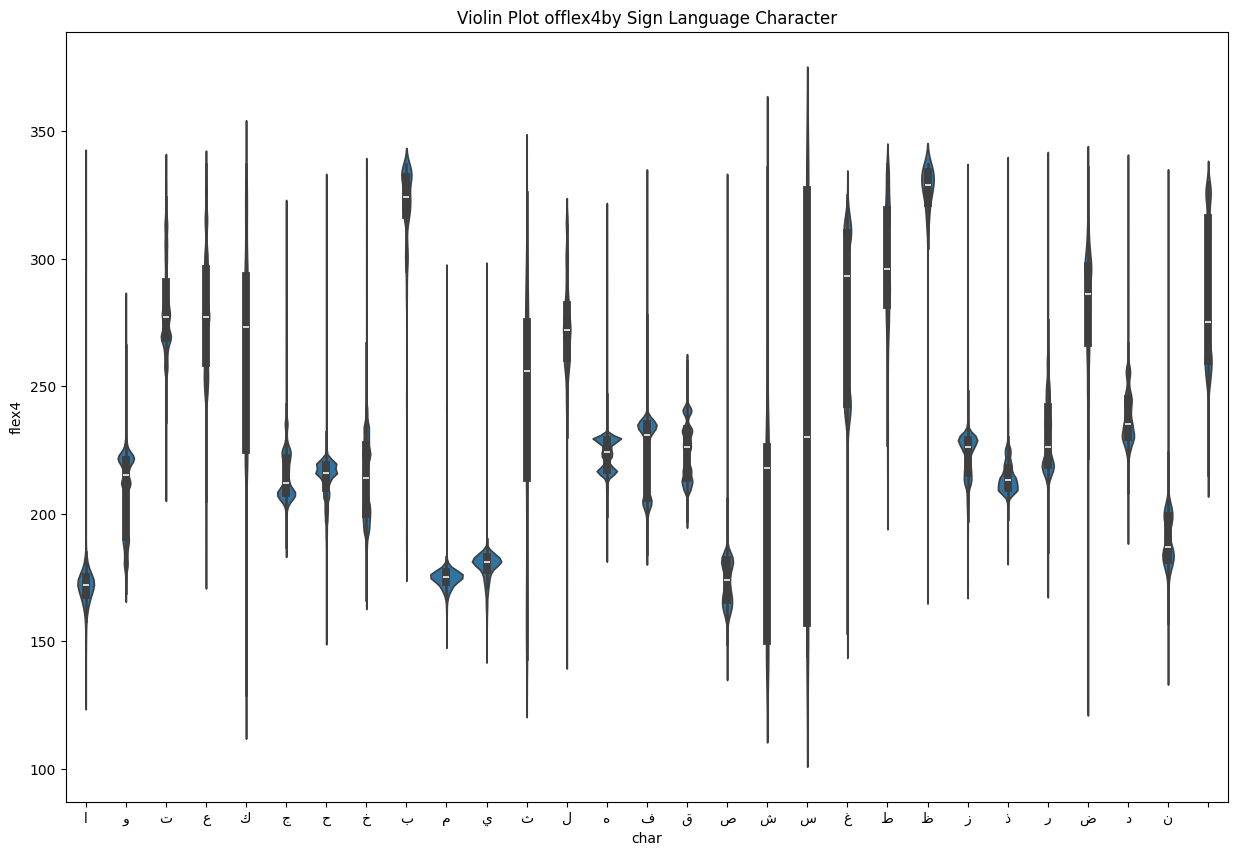

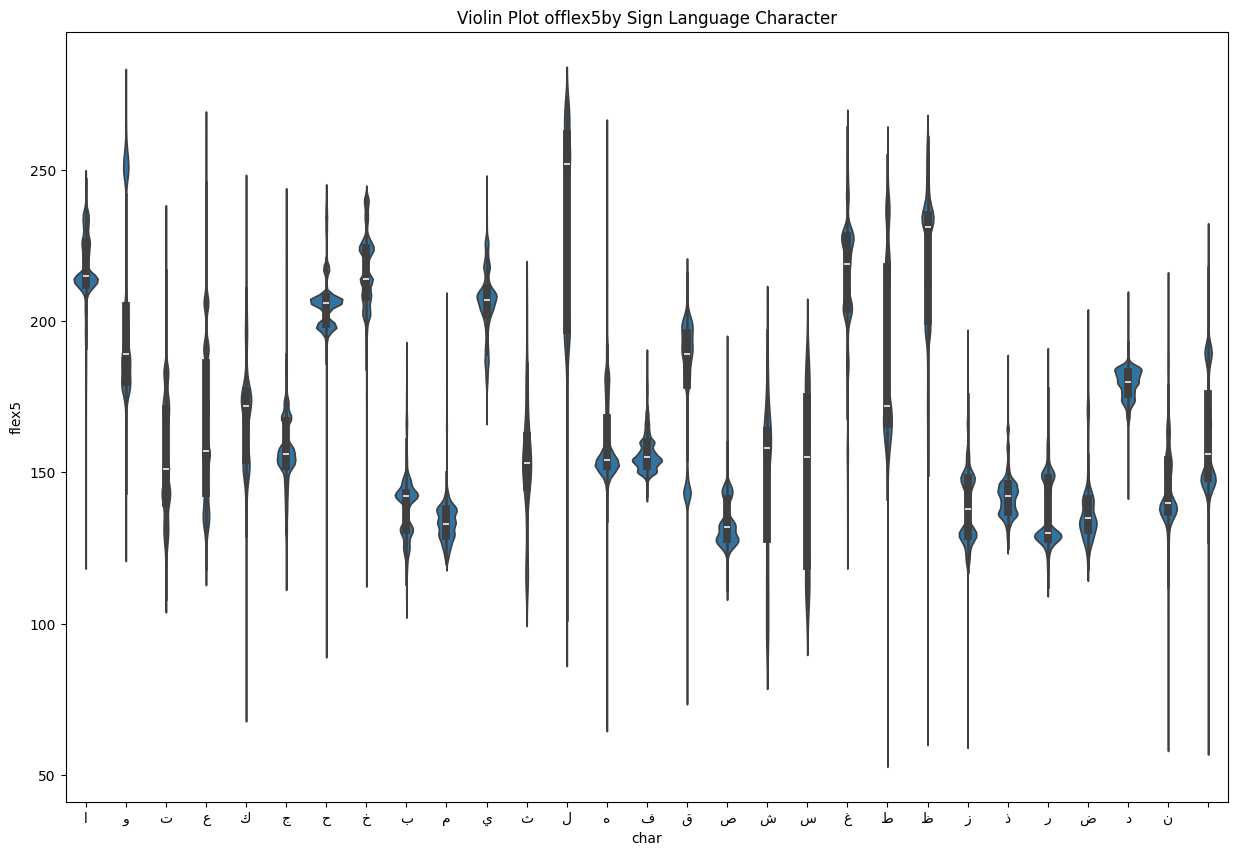

In [19]:
for flex_sensor in flex_features:
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='char', y=flex_sensor, data=data)
    plt.title('Violin Plot of' + flex_sensor + 'by Sign Language Character')
    plt.savefig('violin_plot_' + flex_sensor + '.png')
    plt.show()

# Data Preparation

In [54]:
# Encoding categorical variable 'char' if it's not numeric
if data['char'].dtype == 'object':
    char_to_int = {'ا': 0,
    'ب': 1,
    'ت': 2,
    'ث': 3,
    'ج': 4,
    'ح': 5,
    'خ': 6,
    'د': 7,
    'ذ': 8,
    'ر': 9,
    'ز': 10,
    'س': 11,
    'ش': 12,
    'ص': 13,
    'ض': 14,
    'ط': 15,
    'ظ': 16,
    'ع': 17,
    'غ': 18,
    'ف': 19,
    'ق': 20,
    'ك': 21,
    'ل': 22,
    'م': 23,
    'ن': 24,
    'ه': 25,
    'و': 26,
    'ي': 27,
    ' ': 28}
    int_to_char = {idx: char for char, idx in char_to_int.items()}
    data['char'] = data['char'].map(char_to_int)

# Splitting the data into training and testing sets
X = data.drop('char', axis=1)
y = data['char']
columns_to_scale = [col for col in X.columns if not col.startswith('contact')]

rus = imblearn.over_sampling.RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling the features that need scaling
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Models Training & Testing

In [55]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Test the model
predictions = model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: ", accuracy)

c:\Users\Gehan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model:  0.872224245267824


In [57]:
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model with threshold: {accuracy}")

Accuracy of the model with threshold: 0.9535063270751196


# Scaler & Model Saving

In [11]:
# Save the scaler and the model
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Model Loading & Validation

In [50]:
import pandas as pd
import pickle

int_to_char ={0: 'ا',
 1: 'ب',
 2: 'ت',
 3: 'ث',
 4: 'ج',
 5: 'ح',
 6: 'خ',
 7: 'د',
 8: 'ذ',
 9: 'ر',
 10: 'ز',
 11: 'س',
 12: 'ش',
 13: 'ص',
 14: 'ض',
 15: 'ط',
 16: 'ظ',
 17: 'ع',
 18: 'غ',
 19: 'ف',
 20: 'ق',
 21: 'ك',
 22: 'ل',
 23: 'م',
 24: 'ن',
 25: 'ه',
 26: 'و',
 27: 'ي',
 28: ' '}

# Load the scaler and the model
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

input_dict = {
'gyro_x':0,
'gyro_y':0,
'gyro_z':0,
'flex1':121,
'flex2':260,	
'flex3':536,	
'flex4':300,
'flex5':164,
'contact1':0,
'contact2':0,
'contact3':1
}

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame([input_dict])
# Select features
important_features = ['flex1',	'flex2',	'flex3',	'flex4',	'flex5',	'contact1',	'contact2',	'contact3']
input_df = input_df[important_features]

# Scale the flex sensors readings
columns_to_scale = [col for col in input_df.columns if not col.startswith('contact')]
input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

prediction = model.predict(input_df)

print(f"Prediction for the input dictionary: {int_to_char[prediction[0]]}")

Prediction for the input dictionary: ت
